In [1]:
# Import the various packages needed to work with data
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code in this cell is a trimmed and slightly modified Python script I made.

# This code finds all matching csv files then reads the data to a dataframe.
# Each dataframe of different city data has a column called city added to it.
# The dataframe is then added to a list, each city's data is added to this list.
# Then a single large dataframe is created from this list of city data.

# Indicates current working directory (where this script is located)
dir = '.'

# Used to create a list of csv file names
all_file_names = []

# Used to create a list of csv files
file_list = []

# Search the listed folder for files
for file in os.listdir(dir):
    
    # Only show files starting with 'K' and ending in '.csv'     
    if file.startswith('K') and file.endswith('.csv'):
        
        # Splits file names, i.e.: 'KCLT.csv' -> ['KCLT', '.csv']         
        name = file.split(sep='.')
        
        # Adds the 'KCLT' portion from name to the 'all_file_names' list   
        all_file_names.append(name[0])
        
        # For the current file, read the data and create a dataframe called df         
        df = pd.read_csv(file)
        
        # For each file name in the all_file_names list         
        for file_name in all_file_names:

            # Create new column called 'city' in the data with values of the city name             
            df['city'] = file_name

        # Vertically connect each new file of data from the different city csv files         
        file_list.append(df)
        
# Create a single large dataframe of city weather data
weather_df = pd.concat(file_list)

In [3]:
# Display the new single large dataframe
display(weather_df)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,city
0,2014-7-1,81,70,91,67,89,56,104,1919.0,2012.0,0.00,0.10,5.91,KCLT
1,2014-7-2,85,74,95,68,89,56,101,2008.0,1931.0,0.00,0.10,1.53,KCLT
2,2014-7-3,82,71,93,68,89,56,99,2010.0,1931.0,0.14,0.11,2.50,KCLT
3,2014-7-4,75,64,86,68,89,55,99,1933.0,1955.0,0.00,0.10,2.63,KCLT
4,2014-7-5,72,60,84,68,89,57,100,1967.0,1954.0,0.00,0.10,1.65,KCLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,77,64,89,53,72,46,90,1949.0,2006.0,0.00,0.03,0.32,KSEA
361,2015-6-27,78,63,92,53,72,45,92,1949.0,2015.0,0.00,0.04,0.61,KSEA
362,2015-6-28,74,65,83,54,72,45,91,1949.0,1995.0,0.01,0.04,0.79,KSEA
363,2015-6-29,74,63,84,54,73,45,93,1949.0,1987.0,0.00,0.03,0.64,KSEA


In [4]:
# The file names are not particularly helpful for identifying each unique city, let's change that
weather_df.replace(['KCLT', 'KCQT', 'KHOU', 'KIND', 'KJAX',
                   'KMDW', 'KNYC', 'KPHL', 'KPHX', 'KSEA'],
                   ['Charlotte', 'Los Angeles', 'Houston', 'Indianapolis', 'Jacksonville',
                    'Chicago', 'New York City', 'Philadelphia', 'Phoenix', 'Seattle'], inplace=True)

In [5]:
# Shows various information regarding the columns of data
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3650 non-null   object 
 1   actual_mean_temp       3650 non-null   int64  
 2   actual_min_temp        3650 non-null   int64  
 3   actual_max_temp        3650 non-null   int64  
 4   average_min_temp       3650 non-null   int64  
 5   average_max_temp       3650 non-null   int64  
 6   record_min_temp        3650 non-null   int64  
 7   record_max_temp        3650 non-null   int64  
 8   record_min_temp_year   3649 non-null   float64
 9   record_max_temp_year   3649 non-null   float64
 10  actual_precipitation   3650 non-null   float64
 11  average_precipitation  3650 non-null   float64
 12  record_precipitation   3650 non-null   float64
 13  city                   3650 non-null   object 
dtypes: float64(5), int64(7), object(2)
memory usage: 427.7+ K

In [6]:
# Based on the above we can see that the 'record_min_temp_year' and
# 'record_max_temp_year' columns are each missing a piece of data

# Let's see if we can find and figure out how to deal with this issue
print(weather_df[weather_df.isnull().values.any(axis=1)])

           date  actual_mean_temp  actual_min_temp  actual_max_temp  \
167  2014-12-15                46               43               48   
273   2015-3-31                49               41               57   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
167                23                35               -8               64   
273                36                53               12               85   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
167                1989.0                   NaN                  0.12   
273                   NaN                1986.0                  0.00   

     average_precipitation  record_precipitation     city  
167                   0.08                  1.14  Chicago  
273                   0.11                  2.50  Chicago  


In [7]:
# Found the 2 rows with missing data, they are from the Chicago (KMDW) file

# If the missing data was temperature or precipitation related I would have
# replaced the missing data with the average of the respective columns

# Since specific years are missing, I think it's best to drop the rows with missing data
weather_df.dropna(inplace=True)

In [8]:
# Shows various statistics on the columns with numerical data
weather_df.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,61.530702,52.085526,70.463542,51.390077,70.137061,32.799068,88.100329,1944.834978,1964.083882,0.100872,0.103363,1.944232
std,17.906641,17.308071,19.110743,14.932367,16.739913,19.765930,13.366194,37.877433,34.569293,0.311371,0.053153,1.263265
min,1.000000,-7.000000,7.000000,18.000000,31.000000,-27.000000,51.000000,1871.000000,1871.000000,0.000000,0.000000,0.000000
25%,50.000000,41.000000,58.000000,41.000000,59.000000,21.000000,80.000000,1912.000000,1941.000000,0.000000,0.080000,1.130000
50%,65.000000,55.000000,74.000000,51.000000,72.000000,35.000000,90.000000,1952.000000,1969.000000,0.000000,0.110000,1.740000
75%,75.000000,65.000000,85.000000,64.000000,83.000000,48.000000,98.000000,1975.000000,1991.000000,0.020000,0.130000,2.490000
max,105.000000,94.000000,116.000000,84.000000,107.000000,70.000000,122.000000,2015.000000,2015.000000,4.340000,0.290000,10.340000


In [9]:
# Convert date column to type 'datetime'
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [10]:
# Column #1 'date' now shows a 'Dtype' of 'datetime'
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   3648 non-null   datetime64[ns]
 1   actual_mean_temp       3648 non-null   int64         
 2   actual_min_temp        3648 non-null   int64         
 3   actual_max_temp        3648 non-null   int64         
 4   average_min_temp       3648 non-null   int64         
 5   average_max_temp       3648 non-null   int64         
 6   record_min_temp        3648 non-null   int64         
 7   record_max_temp        3648 non-null   int64         
 8   record_min_temp_year   3648 non-null   float64       
 9   record_max_temp_year   3648 non-null   float64       
 10  actual_precipitation   3648 non-null   float64       
 11  average_precipitation  3648 non-null   float64       
 12  record_precipitation   3648 non-null   float64       
 13  city

<AxesSubplot:xlabel='city', ylabel='record_min_temp'>

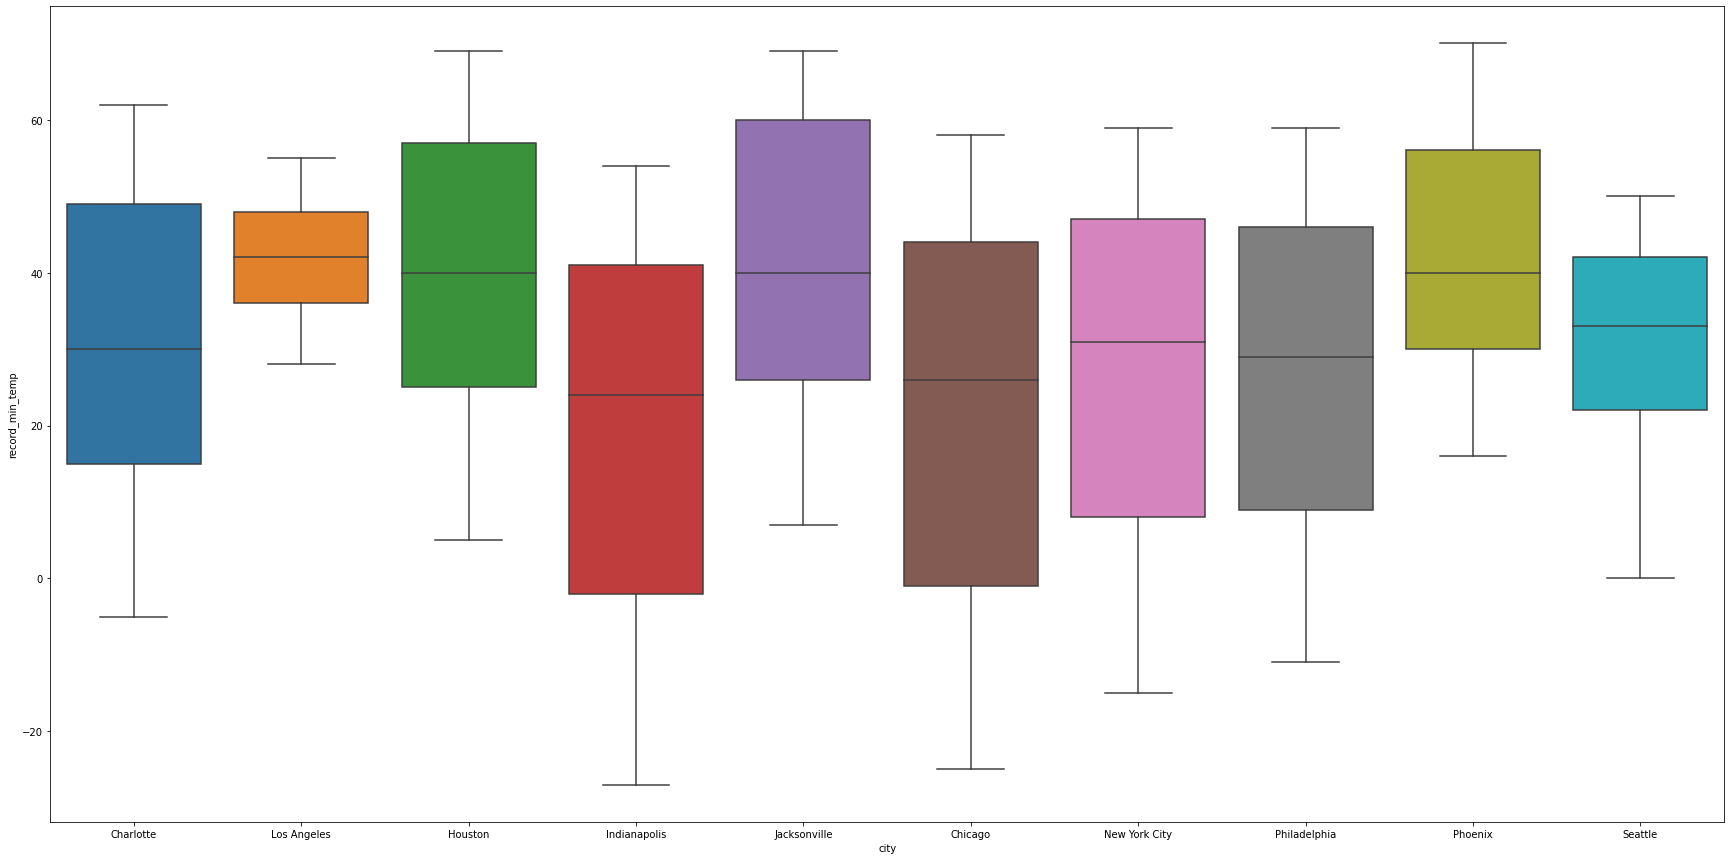

In [11]:
# Box plots represent multiple statistics, in this case only a single column of data is shown: 'record_min_temp'
f, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(data=weather_df, x='city', y='record_min_temp')

<AxesSubplot:xlabel='record_min_temp', ylabel='count'>

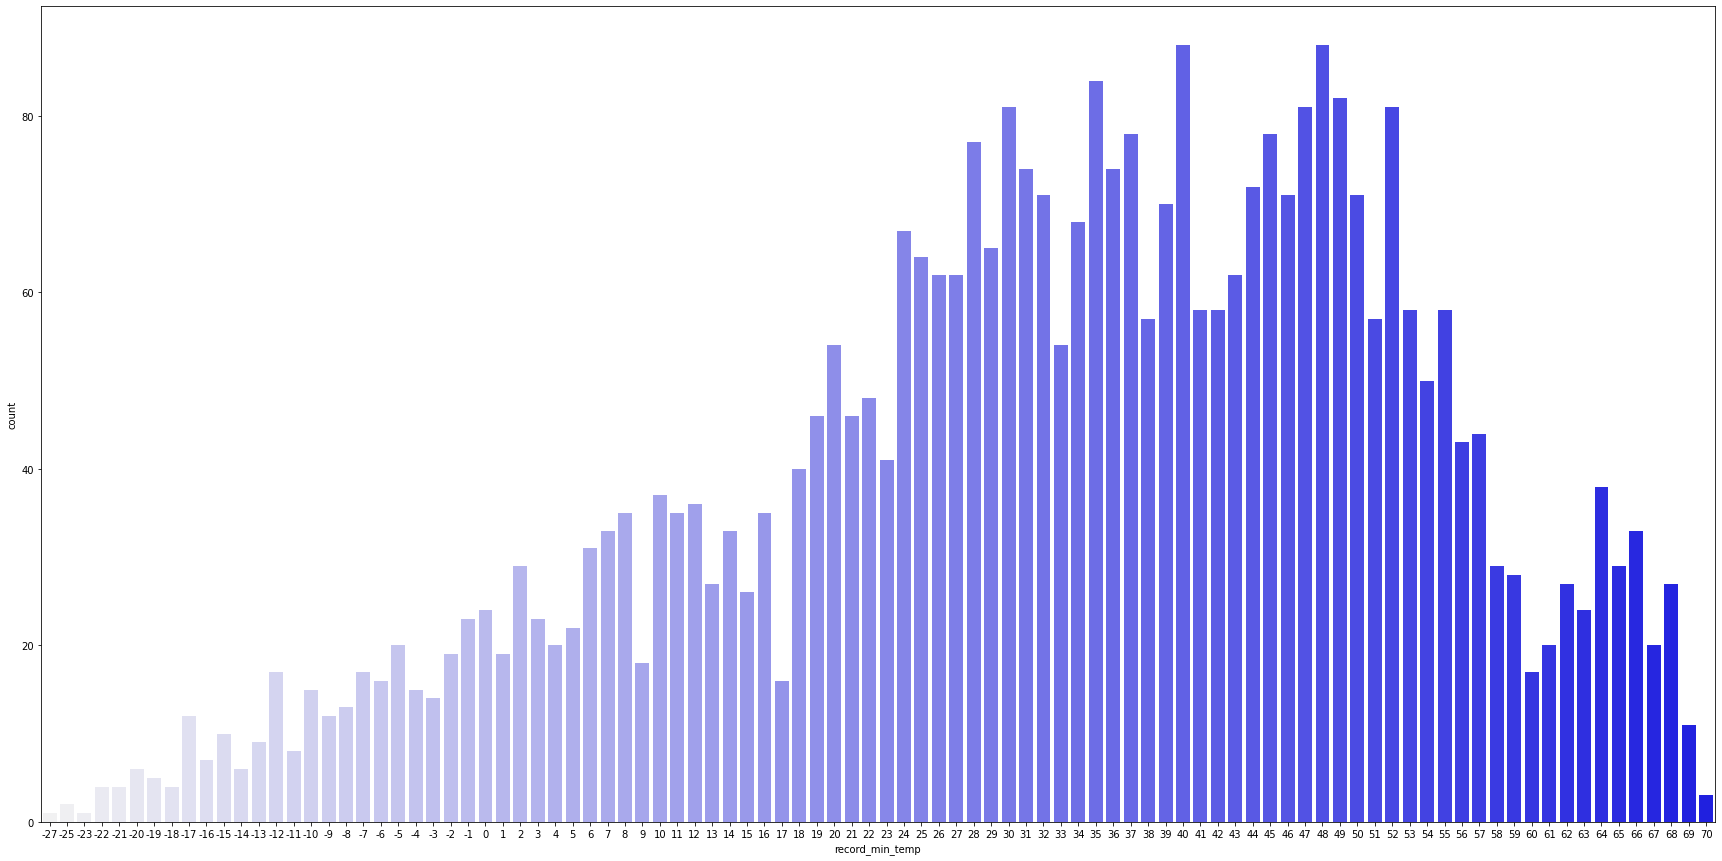

In [13]:
# Count plot visualizes the data from the 'record_min_temp' column
# the ligher the shade of blue the colder the temperature is
f, ax = plt.subplots(figsize=(30, 15))
sns.countplot(x="record_min_temp", data=weather_df, palette="light:b")

In [18]:
# Shows the top 5 most common record minimum temperatures
weather_df['record_min_temp'].value_counts().head()

48    88
40    88
35    84
49    82
30    81
Name: record_min_temp, dtype: int64

In [32]:
# Shows the top 5 coldest minimum temperatures
weather_df.groupby(['record_min_temp']).min().head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,city
record_min_temp,,,,,,,,,,,,,
-27,2015-01-19,35,23,47,20,35,69,1994.0,1907.0,0.00,0.08,0.94,Indianapolis
-25,2015-01-05,9,4,14,18,31,53,1884.0,1954.0,0.01,0.06,0.99,Chicago
-23,2014-12-22,37,27,46,23,37,61,1989.0,1949.0,0.04,0.11,1.62,Indianapolis
-22,2015-01-03,13,0,26,18,31,60,1879.0,1906.0,0.00,0.07,1.26,Chicago
-21,2014-12-21,27,18,36,18,31,57,1982.0,1906.0,0.00,0.07,1.09,Chicago


In [21]:
# These final three cells are the process needed to create an animated visual
import pandas_alive

In [22]:
pivoted_weather_df = weather_df.pivot(index='date', columns='city', values='record_min_temp')

display(pivoted_weather_df.head(5))

city,Charlotte,Chicago,Houston,Indianapolis,Jacksonville,Los Angeles,New York City,Philadelphia,Phoenix,Seattle
date,,,,,,,,,,
2014-07-01,56.0,49.0,66.0,48.0,65.0,52.0,52.0,52.0,65.0,45.0
2014-07-02,56.0,48.0,66.0,50.0,65.0,51.0,56.0,52.0,65.0,43.0
2014-07-03,56.0,50.0,66.0,49.0,63.0,52.0,54.0,54.0,64.0,44.0
2014-07-04,55.0,49.0,66.0,48.0,65.0,53.0,55.0,52.0,63.0,43.0
2014-07-05,57.0,46.0,66.0,49.0,66.0,50.0,53.0,55.0,63.0,47.0


In [23]:
# This code take quite a while to run and process the final ouput gif file so I commented it out for now

# The resulting gif file takes a while to watch the whole things since it goes through each day of the data

# X-axis on the gif is temperature and the gray vertical bar 'follows' the lowest temperature (bottom city on the y-axis)

# If you run the 2 cells above along with this cell, a separate gif file is created in your current folder

# pivoted_weather_df.plot_animated(filename='minimum-temp-over-time-by-city.gif',
#                                  n_visible=10, period_fmt="%Y/%m/%d",
#                                  title='Record Min Temp By City 2014-2015',
#                                  fixed_max=True, perpendicular_bar_func='min')

# Credit for this information goes to:
# https://jackmckew.dev/creating-animated-plots-with-pandas_alive.html